In [23]:
import sys
!{sys.executable} -m pip install sounddevice   
!{sys.executable} -m pip install matplotlib
!{sys.executable} -m pip install numpy      


[notice] A new release of pip is available: 24.0 -> 25.0
[notice] To update, run: C:\Users\ineso\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip

[notice] A new release of pip is available: 24.0 -> 25.0
[notice] To update, run: C:\Users\ineso\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 25.0
[notice] To update, run: C:\Users\ineso\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [24]:
import numpy as np
import sounddevice as sd
import matplotlib.pyplot as plt
import kbhit 
import time # para medir tiempos de ejecución

# gráficos en el notebook
#%matplotlib inline
SRATE = 44100 # Sample rate, para todo el programa

In [39]:
# ejercicio 1
# en el primero pone que hay que usar el random basico pero paso 
# porque es una fumada y quiero hacer el 2

def noise1(dur):
    i = 0
    noise = np.empty([dur*SRATE])
    while i < dur*SRATE:
        # random.choice([-1,1]) para sacar o -1 o 1
        noise[i] = np.random.uniform(-1, 1)
        i += 1

    plt.plot(noise[:100])   #100 primeras muestras
    
    return noise

def noise2(dur):
    #noise = np.empty[dur*SRATE]    #crea un array vacio de size dur*SRATE

    # rellena el array con valores aleatorios entre [-1, 1]
    noise = np.random.uniform(-1, 1, dur*SRATE)

    plt.plot(noise[:100])   #100 primeras muestras

    return noise


time. 3.6468777656555176


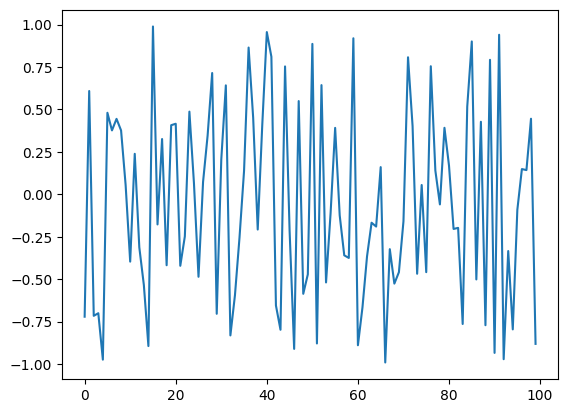

In [166]:
start = time.time()

data = noise1(3)

data * 0.5
sd.play(data, SRATE)
sd.wait()

print(f'time. {time.time() - start}')

In [228]:
#ejercicio 2

def sinusoidal(dur, frec, amp, fase):
    # array vacio
    #noise = np.empty(dur*SRATE)
    soporte = np.arange(dur*SRATE)
    noise = np.sin((((2*np.pi*soporte)*frec)/SRATE*dur) + fase)

    plt.plot(soporte, noise)   #100 primeras muestras

    return noise

# sen((2*pi*xi/SRATE) + fase)
# para aumentar la fase sumar en el argumento del seno

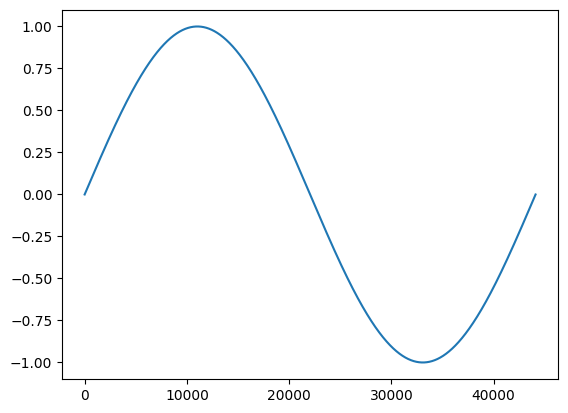

In [229]:

dur = 1
freq = 1
fase = 2*np.pi
amp = 1

data = sinusoidal(dur,freq, amp,fase)

data * 0.5
sd.play(data, SRATE)
sd.wait()

In [230]:
#ejercicio 3
def osc(dur, freq=1, amp=1, phase = 0):
    
    datos = sinusoidal(dur, freq, amp, phase)

    return datos


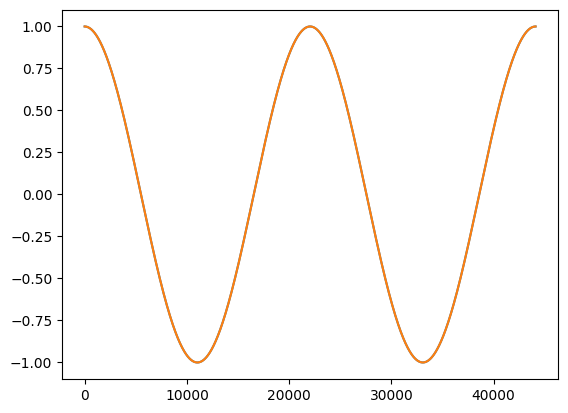

In [231]:

freq = 2
dur = 1
amp = 1
fase = np.pi/2

data = osc(dur,freq,amp,fase)

soporte = np.arange(dur*SRATE)

plt.plot(soporte, data)   #100 primeras muestras

In [232]:
#SOUND DEVICE sd suele funcionar con float32 no float 64
# s = np.floar32(s)

# teclado
teclas = "CDEFGABcdefgab"
frecs = [523.251, 587.33, 659.255, 698.456, 783.991, 880, 987.767]
ext = [f*2 for f in frecs]
tablafrecs = frecs + ext

partitura = [("G", 0.5), ("G",1), ("A",1), ("G",1), ("c", 1), ("B", 2)]
tiempo = 10

def nota(nombre, dur=1, amp=1, phase = 0):
    indx = teclas.index(nombre)
    return osc(dur, tablafrecs[indx], amp, phase)

def partituraLen(partitura):
    i = 0
    cont = 0
    while i<len(partitura):
        cont += partitura[i][1]
        i += 1
    return cont

def happybirthday(partitura):
    
    #calcula la duracion de la partitura
    dur = partituraLen(partitura)
    print(dur)

    #saca un int y eso no le mola por eso se queja lmfao
    song = np.empty(len(partitura)*SRATE)
    i = 0
    # va rellenando segun los datos
    while i<len(partitura):

        note = nota(partitura[i][0], partitura[i][1])
        song = np.append(song, note)

        # ligero silencio
        note = osc(0, 0.02, amp)
        song = np.append(song, note)

        i += 1
    return song



6


C:\Users\ineso\AppData\Local\Temp\ipykernel_26648\2702505282.py:3: RuntimeWarning: invalid value encountered in multiply
  data * 0.5
C:\Users\ineso\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sounddevice.py:2598: RuntimeWarning: overflow encountered in cast
  outdata[:self.blocksize, self.output_mapping] = \
C:\Users\ineso\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sounddevice.py:2598: RuntimeWarning: invalid value encountered in cast
  outdata[:self.blocksize, self.output_mapping] = \


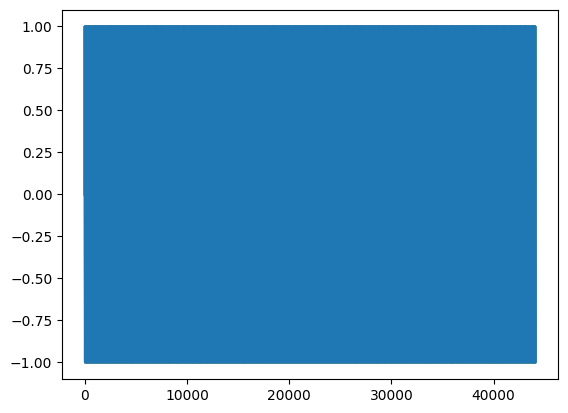

In [233]:
data = happybirthday(partitura)

data * 0.5
sd.play(data, SRATE)
sd.wait()